# Técnicas de Classificação



<ipython-input-25-8a739d1b8d6e>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('No Disorder', inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



===== KNN =====
Acurácia: 0.8750
Precisão: 0.4130
Revocação: 0.4932


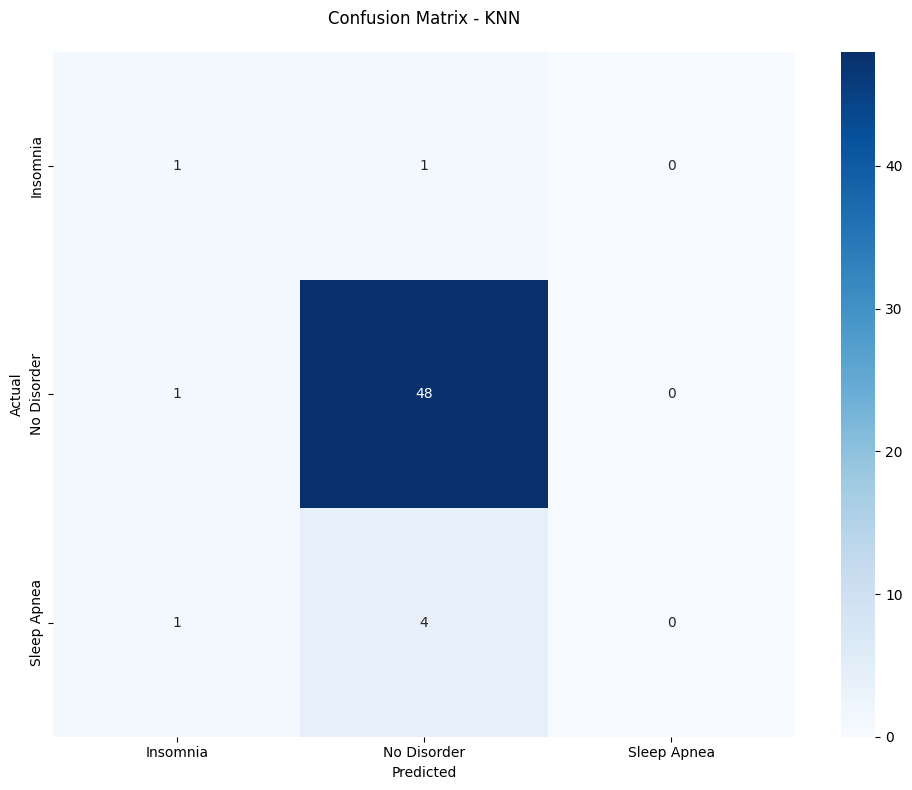


===== Decision Tree =====
Acurácia: 0.8929
Precisão: 0.4808
Revocação: 0.4000


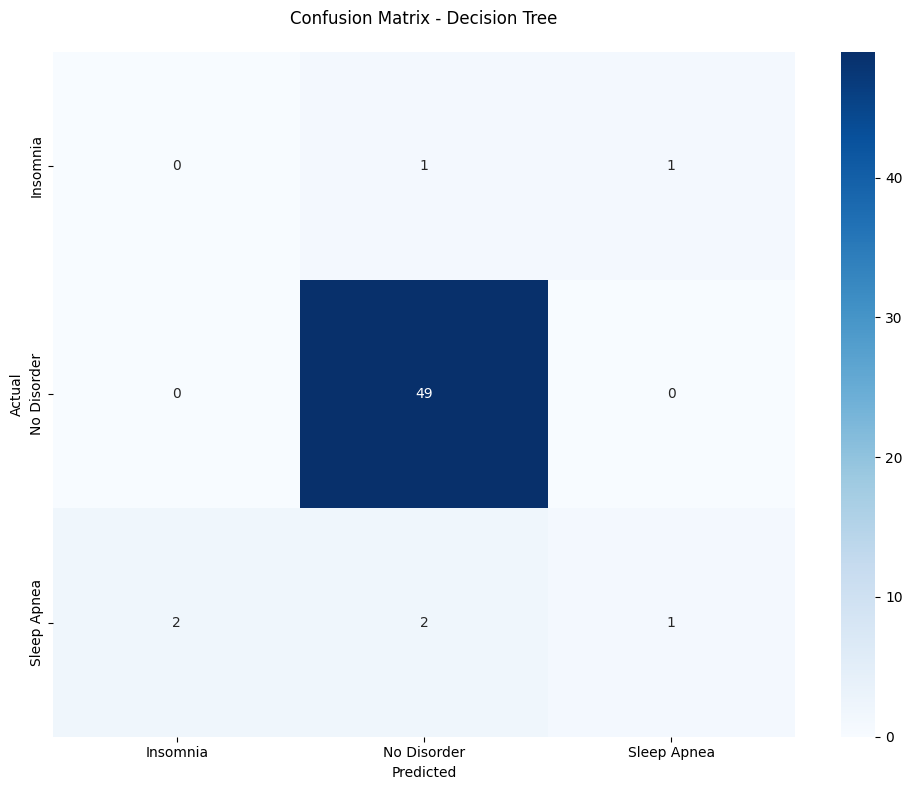


===== Random Forest =====
Acurácia: 0.8929
Precisão: 0.4748
Revocação: 0.4000


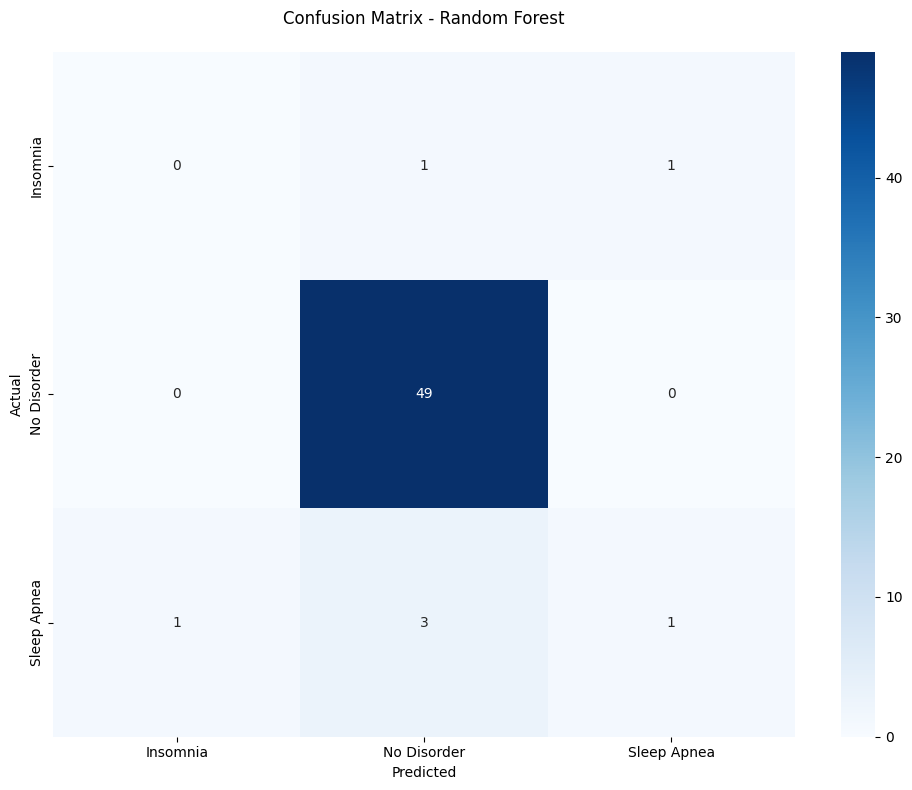

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

df = pd.read_csv("/content/sample_data/base de dados saude.csv")

df['Sleep Disorder'].fillna('No Disorder', inplace=True)

df.fillna(df.mean(numeric_only=True), inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for model_name, model in models.items():
    print(f"\n===== {model_name} =====")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)

    class_labels = label_encoders['Sleep Disorder'].classes_

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Revocação: {recall:.4f}")

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)

    plt.title(f'Confusion Matrix - {model_name}', pad=20)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()